In [1]:
import numpy as np
import cv2
from keras.layers import Dense, Input
from keras.activations import sigmoid
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.datasets import mnist
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.layers.convolutional import UpSampling2D
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten


Using TensorFlow backend.


In [0]:
def AutoEncoder():
  auto = Sequential()
  
  auto.add(Dense(512, input_dim=784))
  auto.add(LeakyReLU())

  auto.add(Dense(256))
  auto.add(LeakyReLU())

  auto.add(Dense(128))
  auto.add(LeakyReLU())

  auto.add(Dense(64))
  auto.add(LeakyReLU())

  auto.add(Dense(256))
  auto.add(LeakyReLU())

  auto.add(Dense(512))
  auto.add(LeakyReLU())

  auto.add(Dense(784, activation='sigmoid'))

  auto.compile(loss='binary_crossentropy', optimizer = 'Adam')

  return auto






In [0]:
def conv_auto():
  auto = Sequential()
  auto.add(Conv2D(32, (3,3), padding='same', input_shape=(28,28,1)))
  auto.add(LeakyReLU())

  auto.add(Conv2D(128, (3,3), padding='same'))
  auto.add(LeakyReLU())

  auto.add(Conv2D(256, (3,3),padding='same'))
  auto.add(LeakyReLU())

  auto.add(Conv2D(64,(3,3), padding='same'))
  auto.add(LeakyReLU())

  auto.add(Conv2D(1, (3,3), padding='same'))
  auto.add(LeakyReLU())

  auto.compile(optimizer='Adam', loss='binary_crossentropy')

  return auto


In [4]:
auto = conv_auto()






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:
auto.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       36992     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 256)       295168    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 28, 28, 256)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)       

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
x = x_train[0]

In [0]:
x = x.astype('float32') / 255.

In [0]:
x = x.reshape(1,28,28,1)

In [12]:
auto.fit(x , x, epochs= 100)




Epoch 1/100





1/1 [==============================] - 14s 14s/step - loss: 1.2091
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 0.1713
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2270
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 0.4610
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 0.5495
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2895
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1433
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 0.1291
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1685
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 0.3128
Epoch 11/100
1/1 [==============================] - 0s 13ms/step - loss: 0.3955
Epoch 12/100
1/1 [==============================] - 0s 10ms/step - loss: 0.2917
Epoch 13/100
1/1 [==============================]

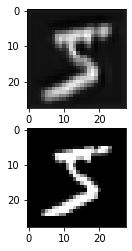

In [13]:
y = auto.predict(x)
y = y.reshape(28,28)
plt.subplot(2,1,1)
plt.imshow(y, cmap='gray')
plt.subplot(2,1,2)
plt.imshow(x_train[0], cmap='gray')

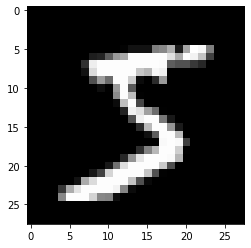

In [0]:
plt.imshow(x_train[0], cmap='gray')

In [0]:
five = x_train[0]
five.shape

(28, 28)

In [0]:
five = five.reshape(1,784)

In [0]:
five.shape

(1, 784)

In [0]:
(x_train,_), (x_test,_) = mnist.load_data()
x_train = x_train.reshape(-1,784)
x_test = x_test.reshape(-1, 784)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [0]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [0]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 34us/step - loss: 0.3460 - val_loss: 0.4362
Epoch 2/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.2552 - val_loss: 0.2564
Epoch 3/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.2291 - val_loss: 0.1822
Epoch 4/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.2121 - val_loss: 0.1356
Epoch 5/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1991 - val_loss: 0.1238
Epoch 6/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1903 - val_loss: 0.1061
Epoch 7/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1819 - val_loss: 0.0932
Epoch 8/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1753 - val_loss: 0.0790
Epoch 9/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1698 - val_loss: 0.0

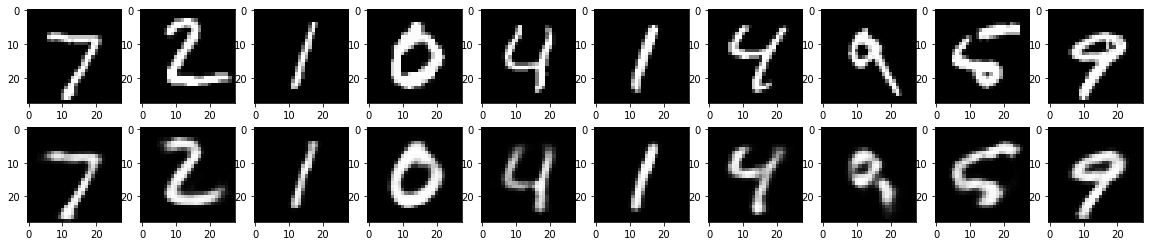

In [0]:
n = 10
y = autoencoder.predict(x_test[:10])
plt.figure(figsize=(20,4))
for i in range(n):
  plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(28,28), cmap='gray')
  plt.subplot(2,n, n+1+i)
  plt.imshow(y[i].reshape(28,28),cmap='gray')

In [0]:
x_test.shape

(10000, 784)

In [0]:
x_test[0:10].shape

(10, 784)

In [0]:
input_img = Input(shape=(28, 28, 1))  # 'channels_firtst'이미지 데이터 형식을 사용하는 경우 이를 적용

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# 이 시점에서 표현(representatoin)은 (4,4,8) 즉, 128 차원

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0   